# This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

In [1]:
# Import the libraries
import math
import yfinance as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# get the stock quote
df = web.download('AAPL', start='2012-01-01', end='2019-12-17')
# show the data
df

/tmp/ipython-input-293892105.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = web.download('AAPL', start='2012-01-01', end='2019-12-17')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345171,12.383297,12.278227,12.290235,302220800
2012-01-04,12.411516,12.448742,12.286633,12.308247,260022000
2012-01-05,12.549309,12.564919,12.388400,12.456847,271269600
2012-01-06,12.680499,12.691006,12.585035,12.601546,318292800
2012-01-09,12.660382,12.841103,12.648974,12.773559,394024400
...,...,...,...,...,...
2019-12-10,64.841484,65.225489,64.208713,64.870464,90420400
2019-12-11,65.394554,65.474258,64.846322,64.921190,78756800


In [3]:
# Get the number of rows and columns in the dataset
df.shape

(2002, 5)

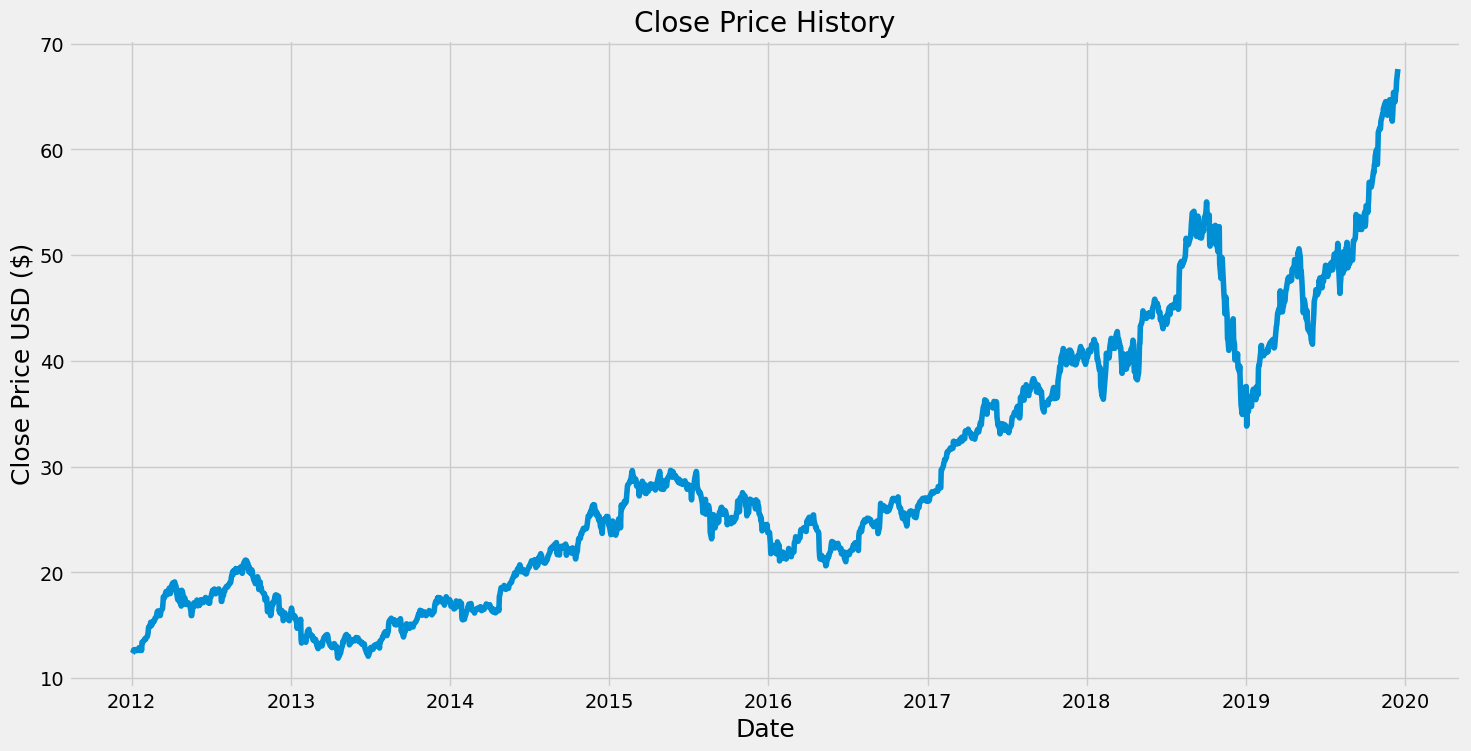

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close column'
data = df['Close']
# Drop the multi-level column index
data.columns = ['Close']
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1602

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00805069],
       [0.00924196],
       [0.0117161 ],
       ...,
       [0.96357342],
       [0.97957494],
       [1.        ]])

In [7]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00805069, 0.00924196, 0.0117161 , 0.01407169, 0.01371048,
       0.01452444, 0.0141525 , 0.01352723, 0.01267558, 0.01531137,
       0.01768857, 0.01695545, 0.01293968, 0.01677219, 0.01299899,
       0.02714848, 0.02605422, 0.02748261, 0.03057127, 0.03244177,
       0.03228541, 0.0317086 , 0.03416661, 0.03647902, 0.03909866,
       0.04333   , 0.05221866, 0.05235344, 0.05730162, 0.06099938,
       0.05464428, 0.0570915 , 0.05704292, 0.06390485, 0.06292912,
       0.06473495, 0.06797978, 0.06978559, 0.07498709, 0.07877654,
       0.07987075, 0.08025357, 0.07377432, 0.07221125, 0.07244293,
       0.07853397, 0.08024826, 0.08392962, 0.09260804, 0.10418633,
       0.10201945, 0.1020249 , 0.11039581, 0.11301571, 0.11115052,
       0.10944729, 0.10767375, 0.11356534, 0.11760805, 0.11930053])]
[np.float64(0.11511781562695583)]

[array([0.00805069, 0.00924196, 0.0117161 , 0.01407169, 0.01371048,
       0.01452444, 0.0141525 , 0.01352723, 0.01267558, 0.01531137,
       0.01768857, 0.01

In [8]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [10]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - loss: 0.0021


In [13]:
# Create the testing data set
# Create a new array containing scaled values frrom index 1542 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
# Convey the data to a numpy array
x_test = np.array(x_test)

In [15]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [16]:
# Get the models predictated price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [17]:
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

np.float64(2.2188717588089375)

/tmp/ipython-input-3436872259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


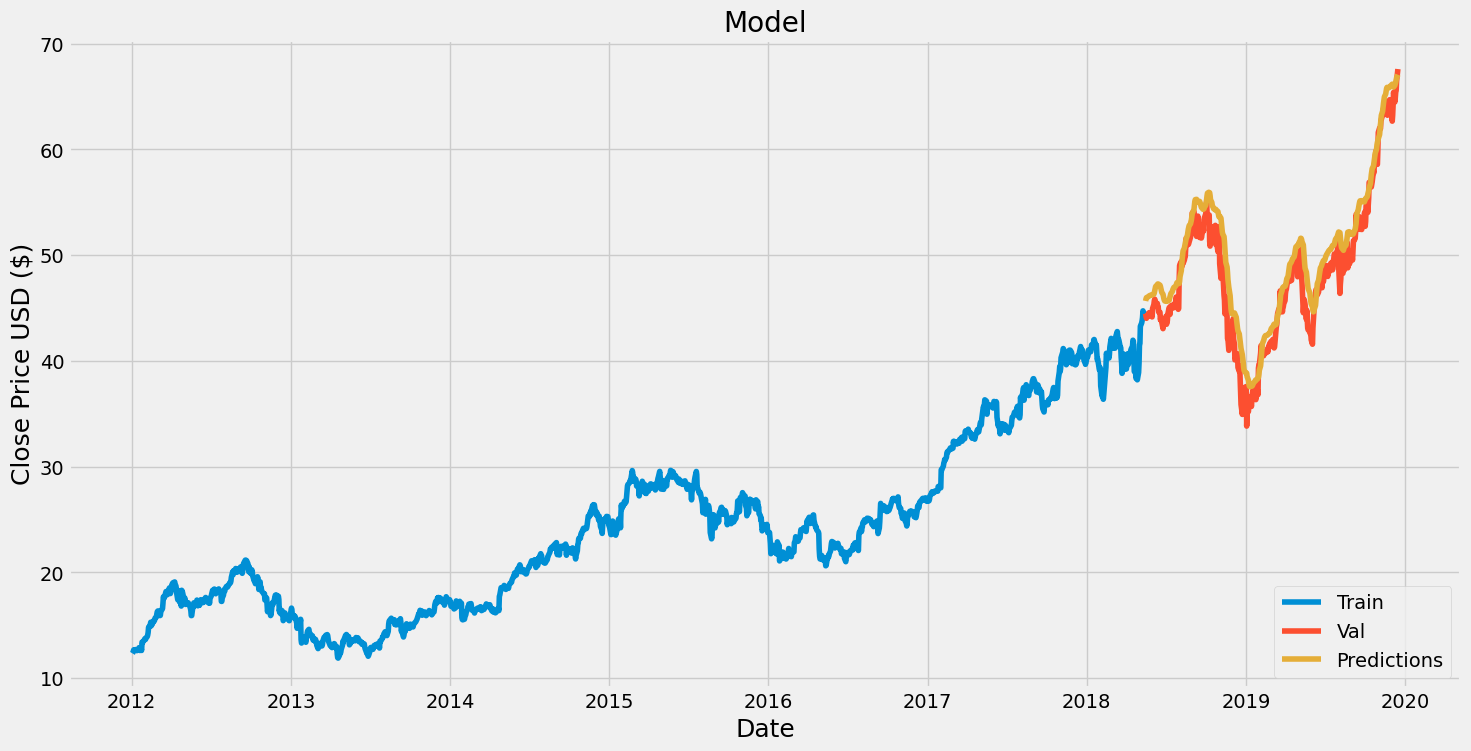

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,44.463596,45.659412
2018-05-17,44.182419,45.861153
2018-05-18,44.021744,45.981529
2018-05-21,44.333645,46.031136
2018-05-22,44.222591,46.071392
...,...,...
2019-12-10,64.841484,66.177727
2019-12-11,65.394554,66.331825
2019-12-12,65.561195,66.535019


In [20]:

# Create a new dataframe
new_df = apple_quote['Close']
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values.reshape(-1, 1)
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

NameError: name 'apple_quote' is not defined

In [ ]:
# Get this quote
apple_quote = web.download('AAPL', start='2019-12-18', end='2019-12-17')
print(apple_quote['Close'])